# Performance

In [1]:
#imported python packages
import numpy as np
import pandas as pd
from math import sqrt

from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBRegressor
from xgboost import plot_importance
import lightgbm as lgb
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error

import time
import pickle
import joblib

In [2]:
# imported training dataset
train_df = pd.read_csv('train.csv')
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150047 entries, 0 to 3150046
Data columns (total 28 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   date_block_num                  int64  
 1   shop_id                         int64  
 2   item_id                         int64  
 3   item_price                      float64
 4   item_cnt_day                    float64
 5   revenue                         float64
 6   item_cnt_month                  float64
 7   city_code                       int64  
 8   item_category_id                int64  
 9   type_code                       int64  
 10  subtype_code                    int64  
 11  date_avg_item_cnt               float64
 12  date_item_avg_item_cnt          float64
 13  date_shop_avg_item_cnt          float64
 14  date_cat_avg_item_cnt           float64
 15  date_shop_cat_avg_item_cnt      float64
 16  date_shop_type_avg_item_cnt     float64
 17  date_shop_subtype_avg_item_

,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,item_cnt_month,city_code,item_category_id,type_code,...,date_city_avg_item_cnt,date_item_city_avg_item_cnt,date_type_avg_item_cnt,date_subtype_avg_item_cnt,item_avg_item_price,date_item_avg_item_price,date_shop_revenue,shop_avg_revenue,delta_revenue,month
0,0,59,22154,999.00,1.0,999.00,1.0,31,37,11,...,3.836,1.0,3.697,2.463,410.5,999.0,1633431.0,1292188.0,0.2642,0
1,0,25,2552,899.00,1.0,899.00,0.0,14,58,13,...,5.152,0.0,2.076,1.253,938.0,899.0,5376478.0,6185159.0,-0.1307,0
2,0,25,2552,899.00,-1.0,-899.00,0.0,14,58,13,...,5.152,0.0,2.076,1.253,938.0,899.0,5376478.0,6185159.0,-0.1307,0
3,0,25,2554,1709.05,1.0,1709.05,1.0,14,58,13,...,5.152,1.0,2.076,1.253,1709.0,1709.0,5376478.0,6185159.0,-0.1307,0
4,0,25,2555,1099.00,1.0,1099.00,1.0,14,56,13,...,5.152,1.0,2.076,1.226,1123.0,1099.0,5376478.0,6185159.0,-0.1307,0


In [3]:
# dropped item_id as decided in vizualization notebook
train = train_df.drop(['item_id'],axis=1)

In [4]:
# training, validation, and test dataset is created.
X_train_df = train[train.date_block_num < 33].drop(['item_cnt_month'], axis=1)
Y_train_df = train[train.date_block_num < 33]['item_cnt_month']
X_valid = train[train.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_valid = train[train.date_block_num == 33]['item_cnt_month']
X_test = train[train.date_block_num == 34].drop(['item_cnt_month'], axis=1)

In [5]:
# XGB model loaded
xgb_model = joblib.load('xgb_model.joblib')

In [6]:
# get the predictions for the validation data
Y_pred_xgb = xgb_model.predict(X_valid).clip(0,20)

In [7]:
# dataset created for the difference between valid and test prediction
accuracy_xgb = ((Y_pred_xgb-Y_valid)/Y_valid)

In [8]:
# LGBM Model loaded
lgb_model = joblib.load('lgb_model.joblib')

In [9]:
# get the predictions for the validation data
Y_pred_lgb = lgb_model.predict(X_valid).clip(0,20)

In [10]:
# dataset created for the difference between valid and test prediction
accuracy_lgb = ((Y_pred_lgb-Y_valid)/Y_valid)

In [11]:
# reshaping training, validation and test data for LSTM model
X_train=X_train_df.values.reshape((X_train_df.shape[0],X_train_df.shape[1],1))
X_valid=X_valid.values.reshape((X_valid.shape[0],X_valid.shape[1],1))

Y_train=Y_train_df.values.reshape((Y_train_df.shape[0],1))
Y_valid=Y_valid.values.reshape((Y_valid.shape[0],1))

X_test=X_test.values.reshape((X_test.shape[0],X_test.shape[1],1))

In [12]:
# LSTM Model loaded
lstm_model = joblib.load('lstm_model.joblib')

2022-12-13 14:38:29.290361: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-13 14:38:29.832483: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-13 14:38:29.984217: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-13 14:38:29.984257: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [13]:
# get the predictions for the validation data
Y_pred_lstm = lstm_model.predict(X_valid).clip(0,20)

1673/1673 [==============================] - 12s 6ms/step


In [14]:
# dataset created for the difference between valid and test prediction
accuracy_lstm = ((Y_pred_lstm-Y_valid)/Y_valid)

/tmp/ipykernel_96/2735645454.py:2: RuntimeWarning: divide by zero encountered in true_divide
  accuracy_lstm = ((Y_pred_lstm-Y_valid)/Y_valid)


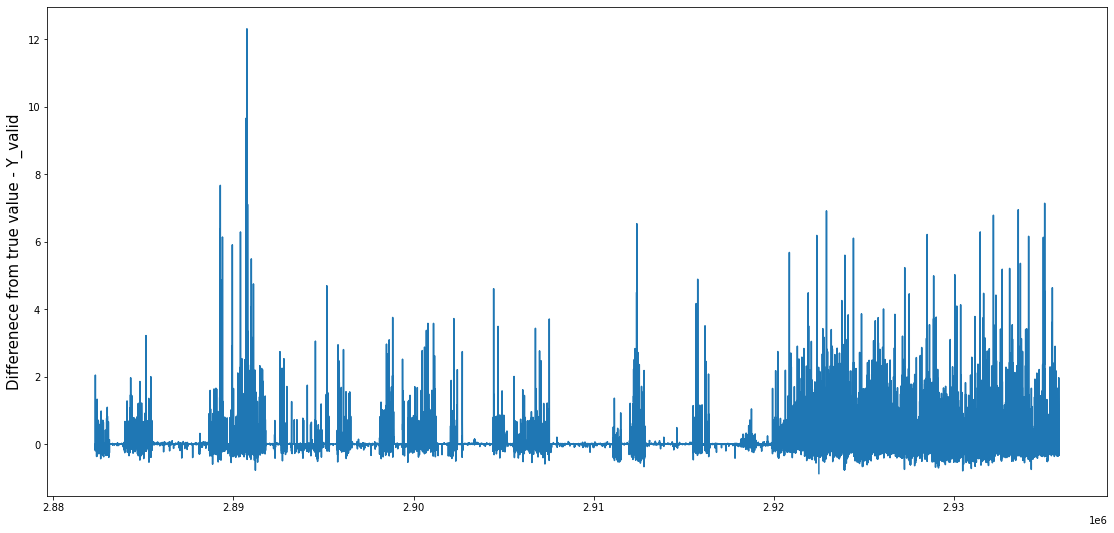

In [16]:
# performnace plot for xgb
fig = plt.figure(figsize = (19,9))
plt.plot(accuracy_xgb)
plt.ylabel("Differenece from true value - Y_valid",fontsize=15)
plt.show()

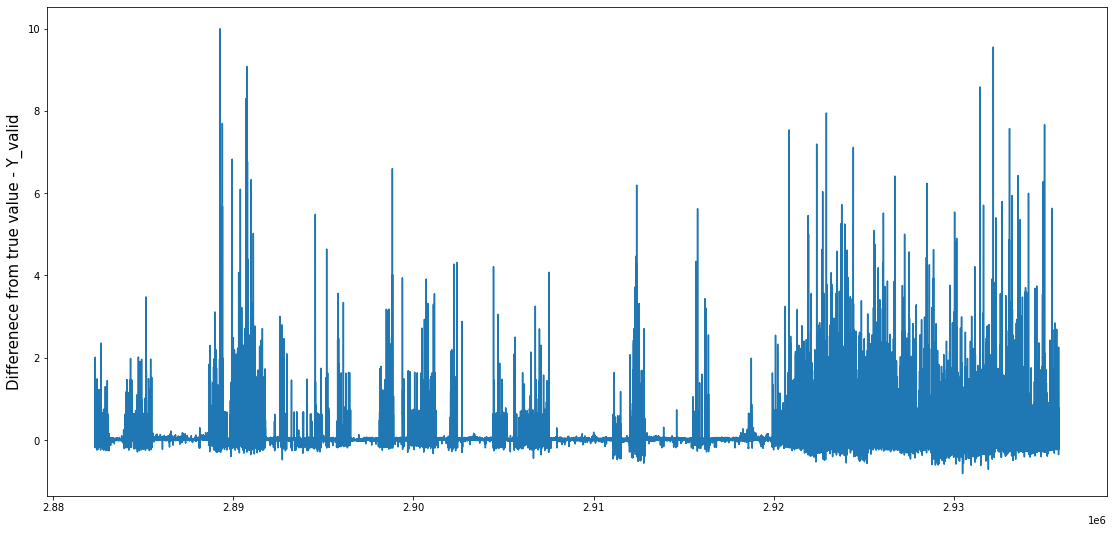

In [17]:
# performnace plot for lgbm
fig = plt.figure(figsize = (19,9))
plt.plot(accuracy_lgb)
plt.ylabel("Differenece from true value - Y_valid",fontsize=15)
plt.show()

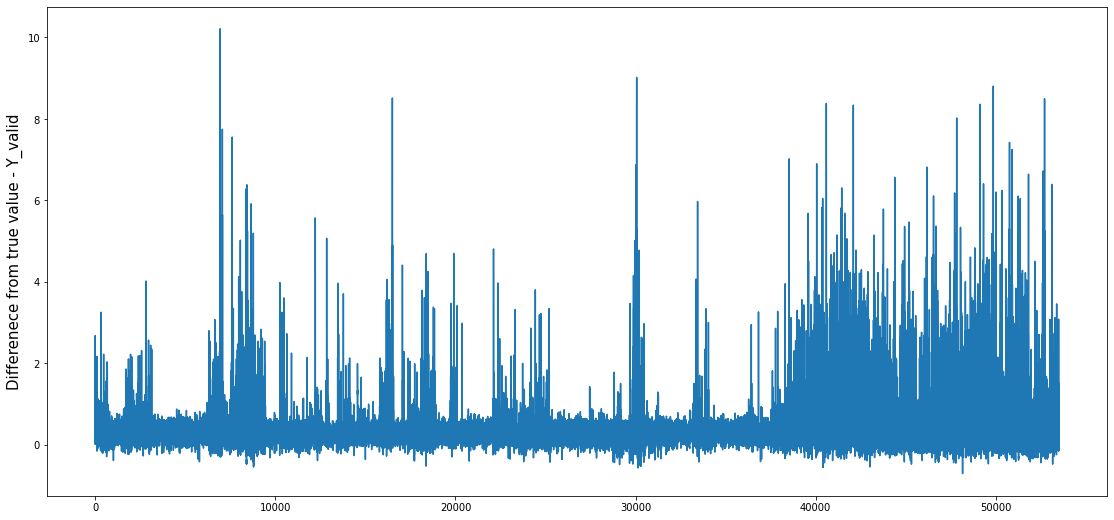

In [18]:
# performnace plot for lstm
fig = plt.figure(figsize = (19,9))
plt.plot(accuracy_lstm)
plt.ylabel("Differenece from true value - Y_valid",fontsize=15)
plt.show()

#### From the plots it is seen that the XGBRegressor model was the best among the 3 models as the predicted data was closer to the true value and condensed than the other models. But still, there is large variation from the true value of validation data in XGB model. Overall, the XGB model was not as effective.